In [1]:
import numpy as np
import pandas as pd

In [62]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
sns.set(style="whitegrid")

In [5]:
%matplotlib inline

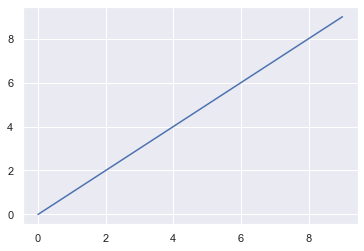

In [7]:
import numpy as np
data = np.arange(10)
plt.plot(data);

In [8]:
# графики живут внутри рисунка Figure:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

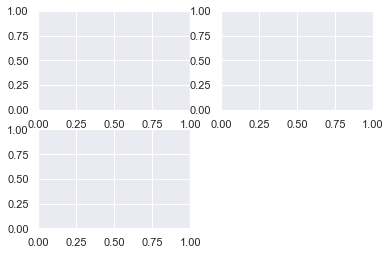

In [10]:
fig = plt.figure()
# создадим подграфики:
ax1 = fig.add_subplot(2, 2, 1) # сетка и номер рисунка
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

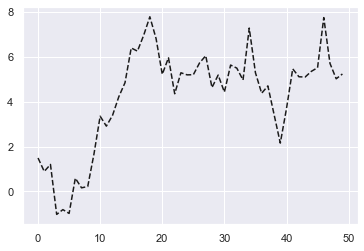

In [11]:
plt.plot(np.random.randn(50).cumsum(), 'k--')

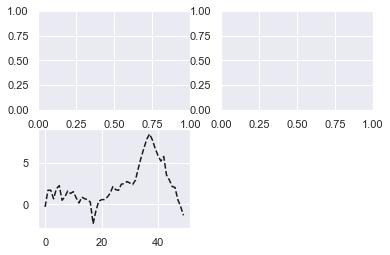

In [12]:
fig = plt.figure()
# создадим подграфики:
ax1 = fig.add_subplot(2, 2, 1) # сетка и номер рисунка
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
plt.plot(np.random.randn(50).cumsum(), 'k--')

In [13]:
_ = ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))

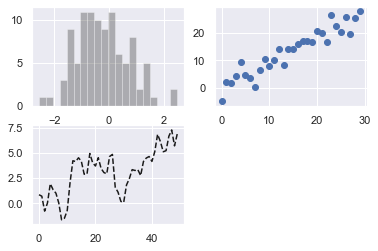

In [15]:
fig = plt.figure()
# создадим подграфики:
ax1 = fig.add_subplot(2, 2, 1) # сетка и номер рисунка
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

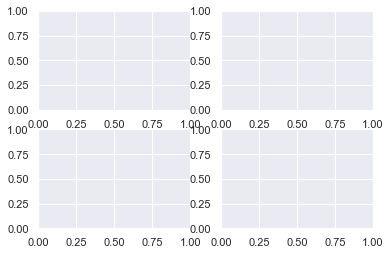

In [17]:
# возвращает массив подграфиков
fig, axes = plt.subplots(2, 2)
axes

In [19]:
axes[1, 1]

<AxesSubplot:>

In [21]:
pd.DataFrame.plot?

Init signature: pd.DataFrame.plot(data)
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot
    - 'pie' : pie plot
    - 'scatter' : scatter plot
    - 'hexbin' : hexbin plot.
ax : matplotlib axes object, default None
    An axes of the current figure.
subplots : bool, default False
    

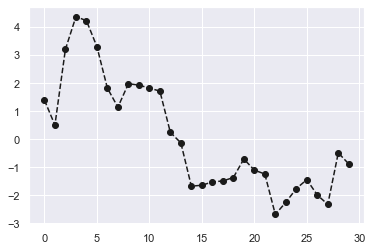

In [23]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--'); # plot(randn(30).cumsum(), color='k', linestyle='dashed', marker='o')

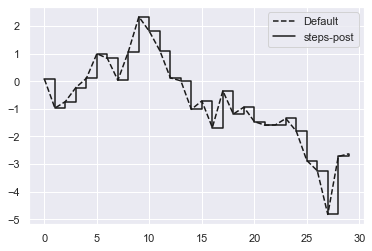

In [30]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend();

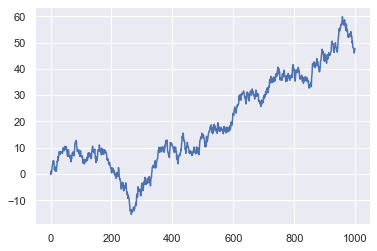

In [32]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

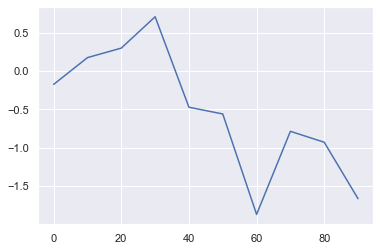

In [36]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s.plot();

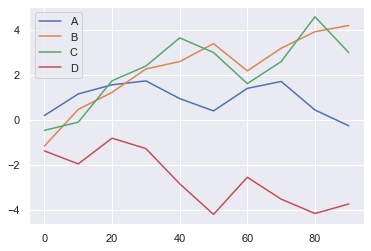

In [37]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot();

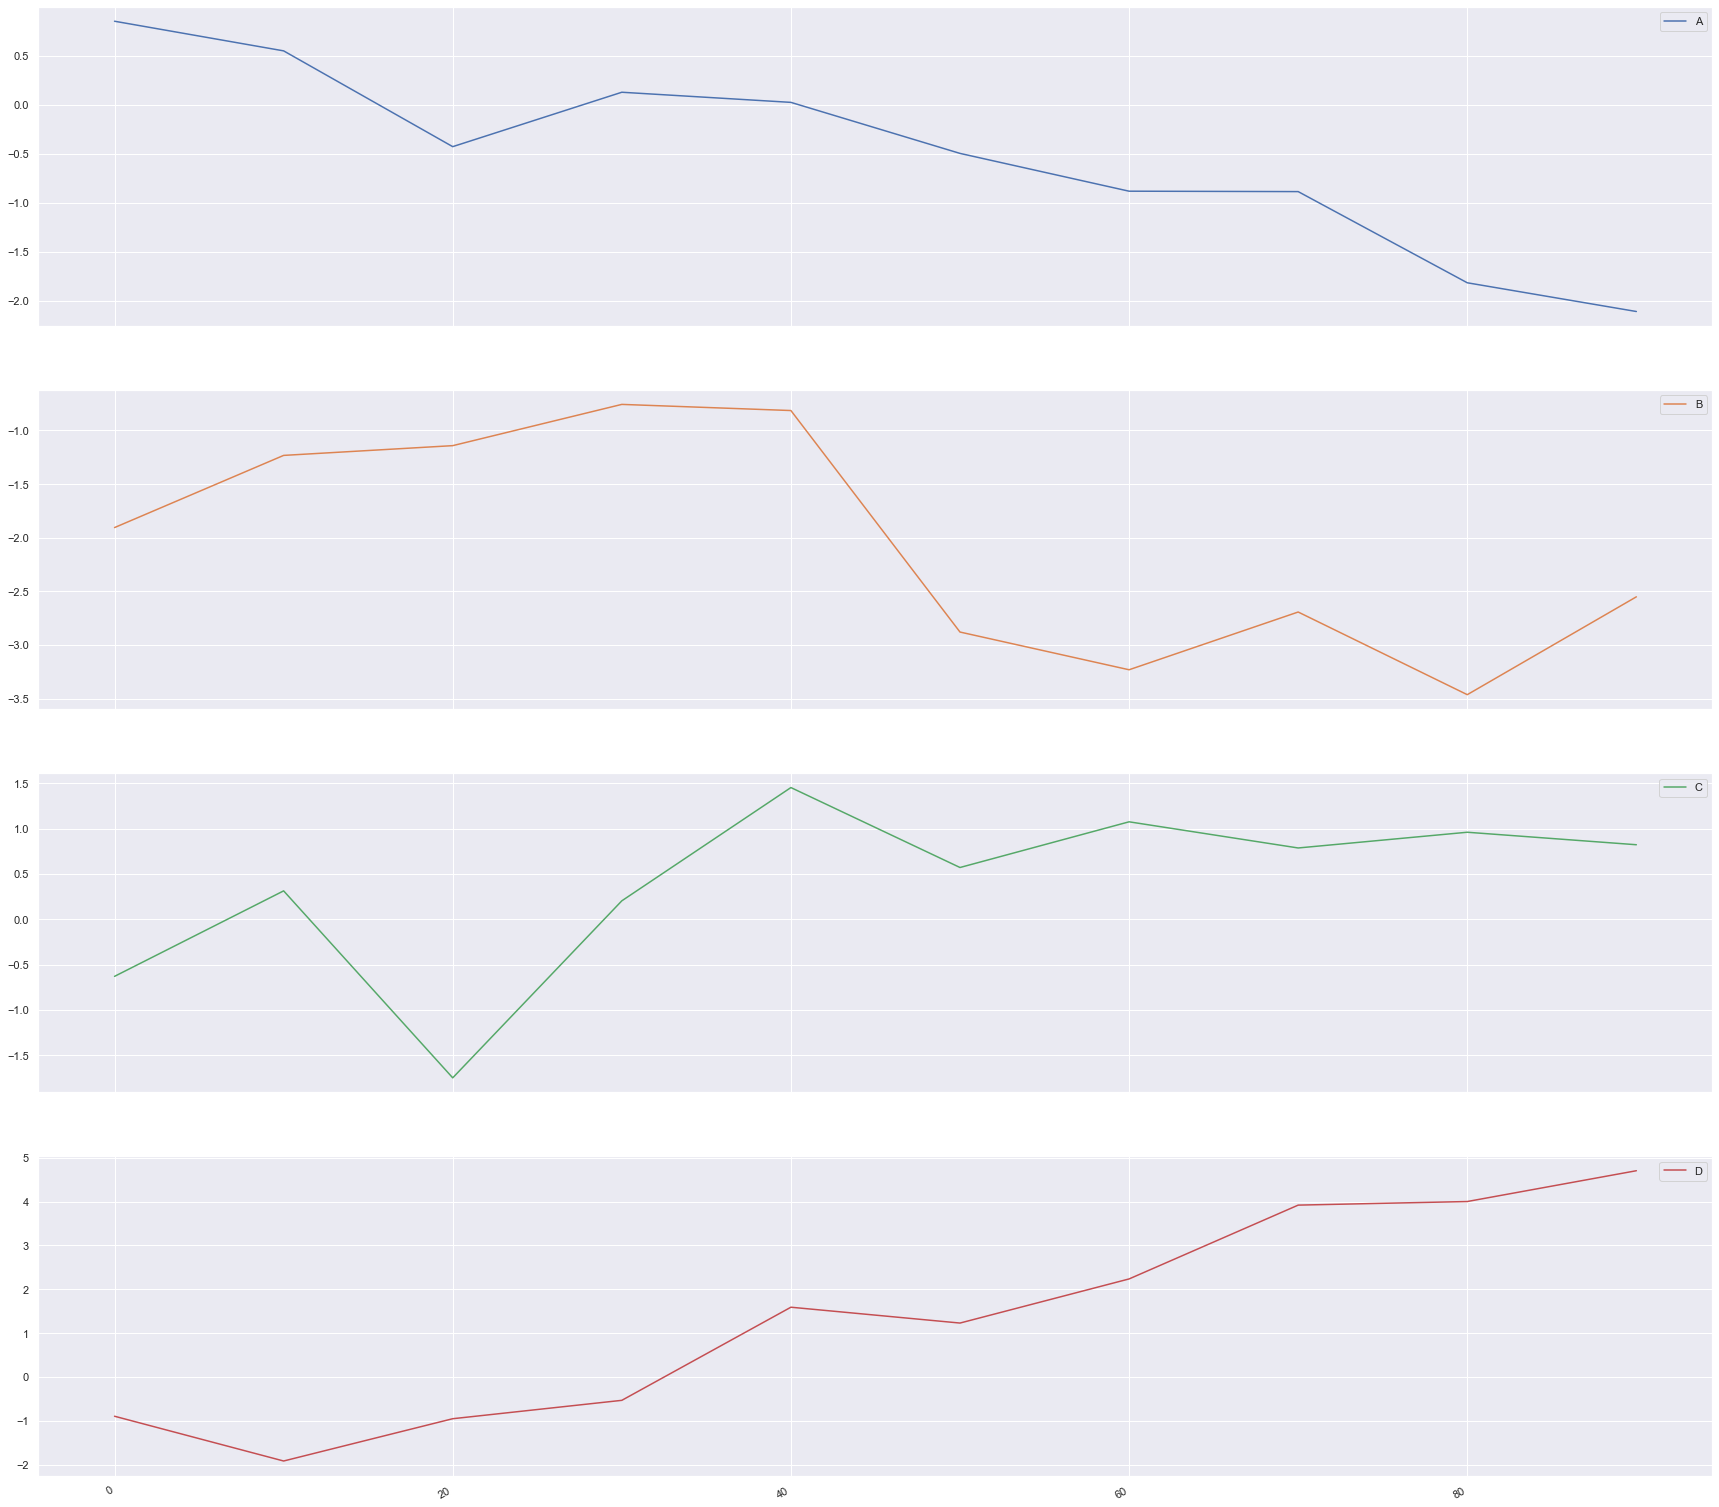

In [47]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df.plot(subplots=True, sharex=True, figsize=(30, 30));

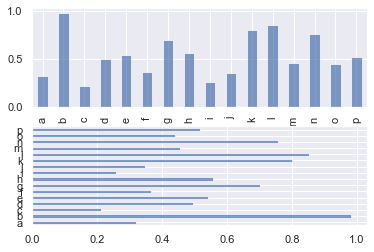

In [48]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], alpha=0.7)
data.plot.barh(ax=axes[1], alpha=0.7);

In [49]:
np.random.seed(12348)

<AxesSubplot:>

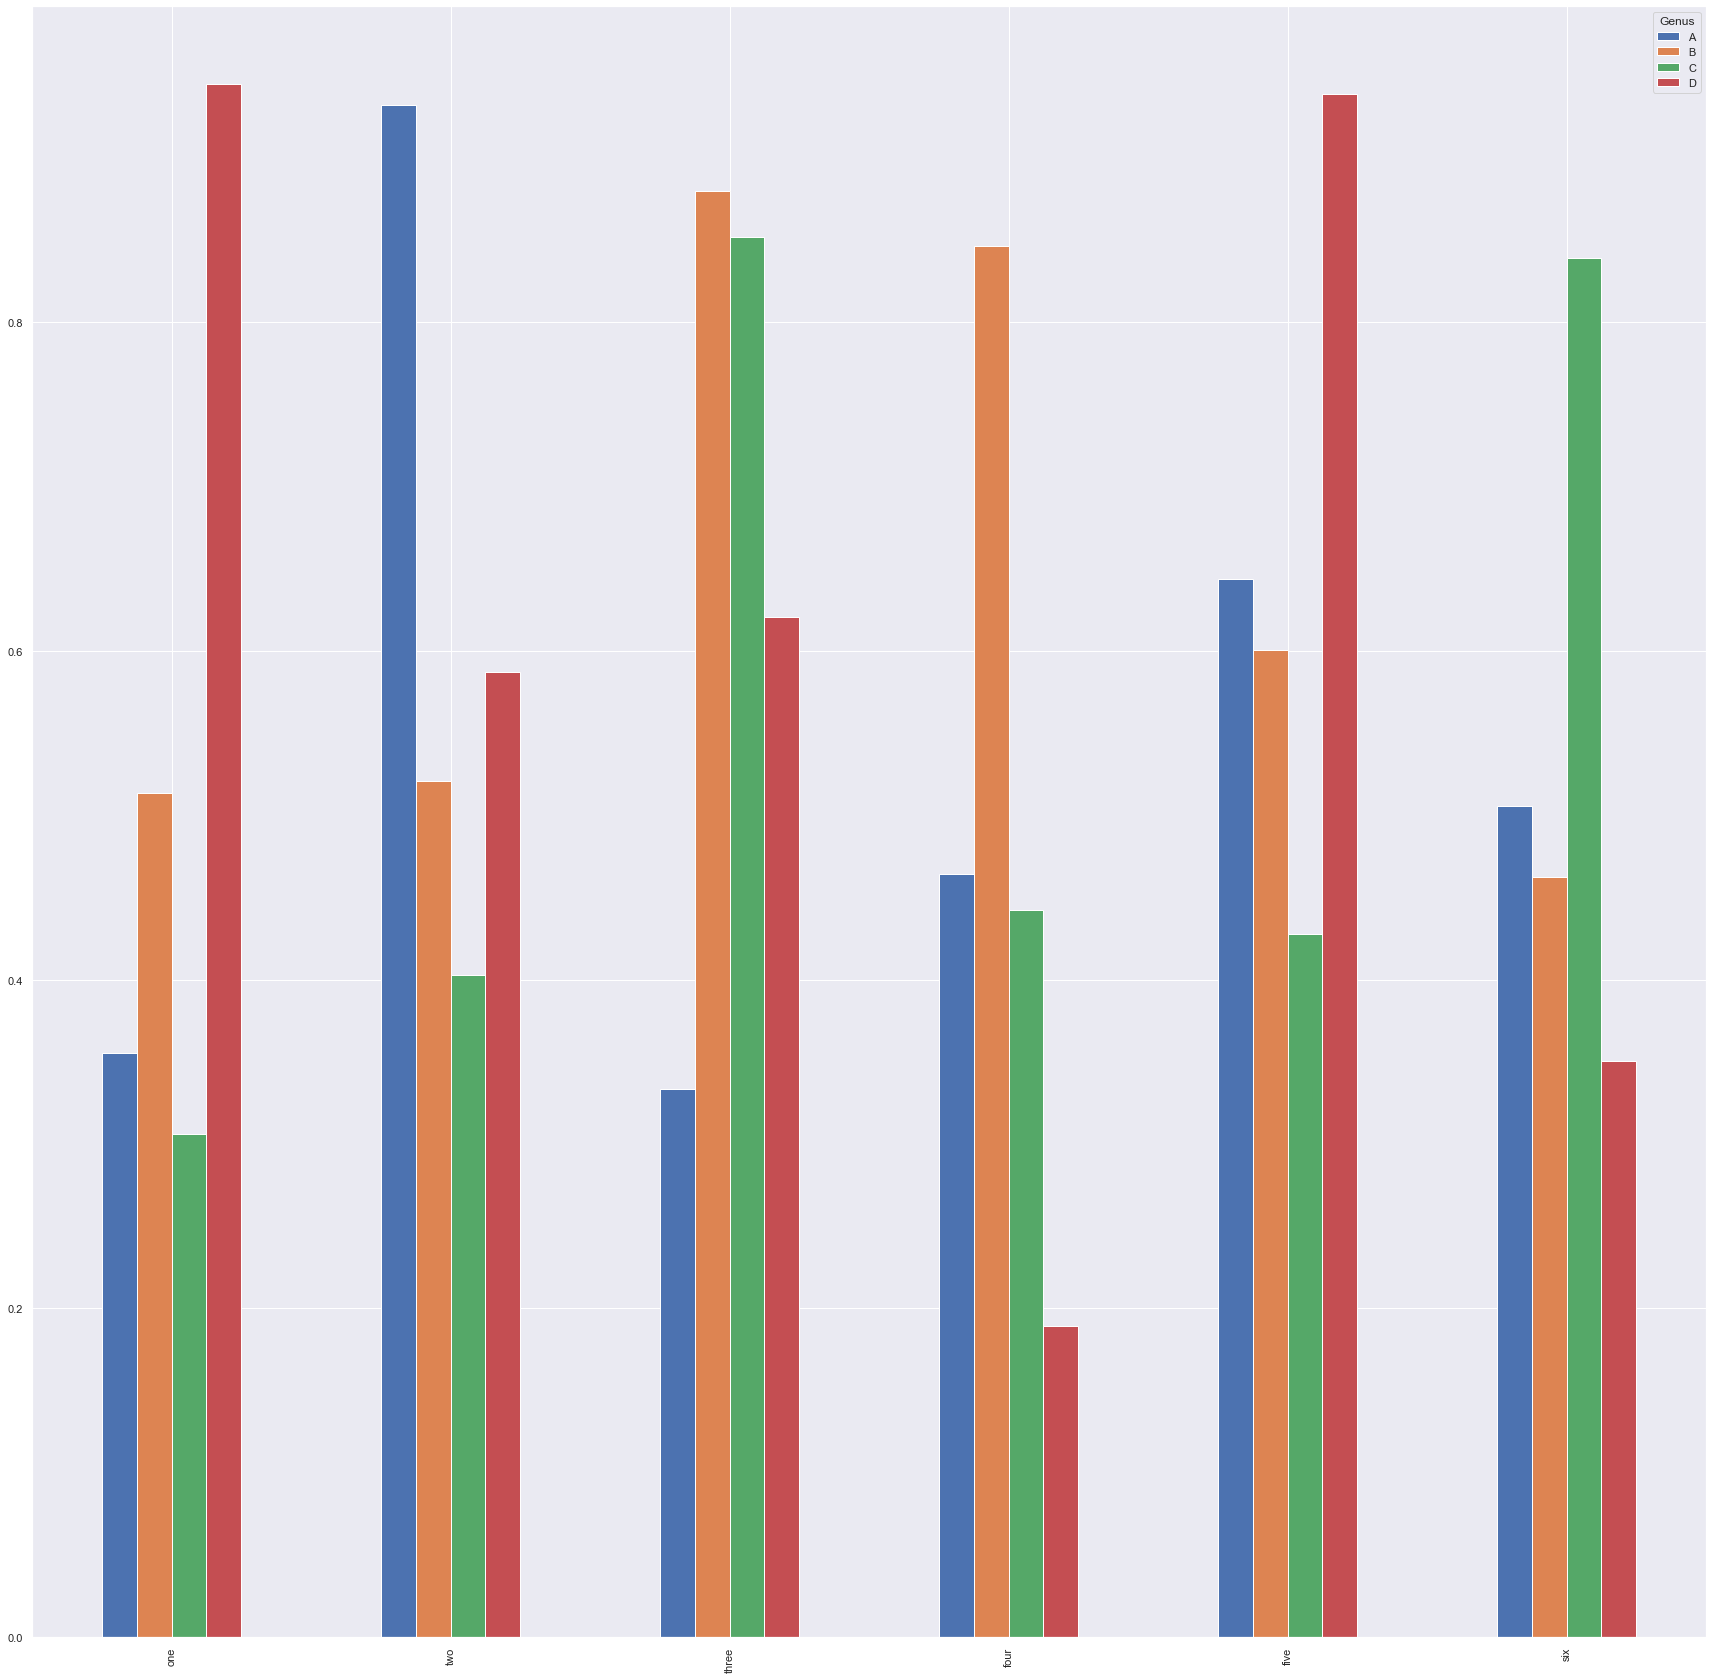

In [51]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df
df.plot.bar(figsize=(30, 30))

<AxesSubplot:>

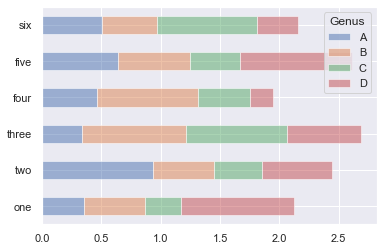

In [52]:
df.plot.barh(stacked=True, alpha=0.5)

In [53]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [54]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [56]:
# Группы, насчитывющие 1 и 6 гостей редки
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Thur,48,4,5,1
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3


In [57]:
# Нормализация, чтобы сумма в строке была равна 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


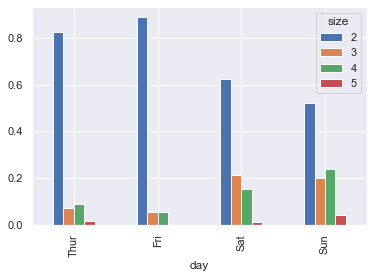

In [58]:
party_pcts.plot.bar();

Считаем процент чаевых в зависимости от дня:

In [59]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069


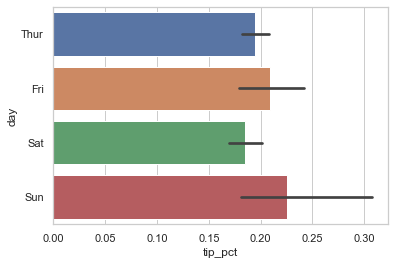

In [63]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h');

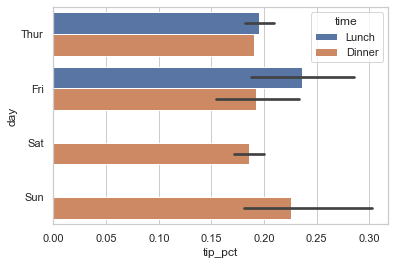

In [64]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h'); # с разбиением по времени

Распределение чаевых от общей суммы счета:

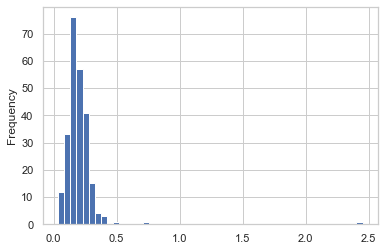

In [65]:
tips['tip_pct'].plot.hist(bins=50);

<AxesSubplot:ylabel='Density'>

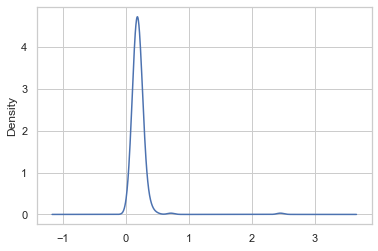

In [66]:
# график ядерной оценки плотности:
tips['tip_pct'].plot.density();

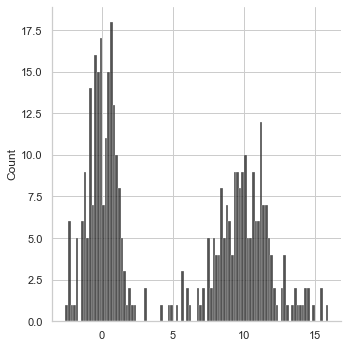

In [72]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
sns.displot(values, bins=100, color='k')
#sns.histplot(values, bins=100, color='k')